# Kaggle Machine Learning Competition: Predicting Titanic Survivors

## Competition Site

Description, Evaluation, and Data Set taken from the [competition site](https://www.kaggle.com/c/titanic-gettingStarted).

## Description

![alt text](http://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Goal

It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

## Metric

Your score is the percentage of passengers you correctly predict. This is known simply as ["accuracy”](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification).

## Evaluation

The historical data has been split into two groups, a 'training set' and a 'test set'.  For the training set, we provide the outcome ( 'ground truth' ) for each passenger.  You will use this set to build your model to generate predictions for the test set.

For each passenger in the test set, you must predict whether or not they survived the sinking ( 0 for deceased, 1 for survived ).  Your score is the percentage of passengers you correctly predict.

 The Kaggle leaderboard has a public and private component.  50% of your predictions for the test set have been randomly assigned to the public leaderboard ( the same 50% for all users ).  Your score on this public portion is what will appear on the leaderboard.  At the end of the contest, we will reveal your score on the private 50% of the data, which will determine the final winner.  This method prevents users from 'overfitting' to the leaderboard.

## Data Set

The data has been split into two groups:

    training set (train.csv)
    test set (test.csv)
    
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

## Data Dictionary

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them

## Setup Imports and Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

## Reading In the Data

In [2]:
titanic_train = pd.read_csv('C:/Users/i7/csv/kaggle/titanic/train.csv')
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploring the Data

In [3]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_train.shape

(891, 12)

In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Exploratory Data Analysis

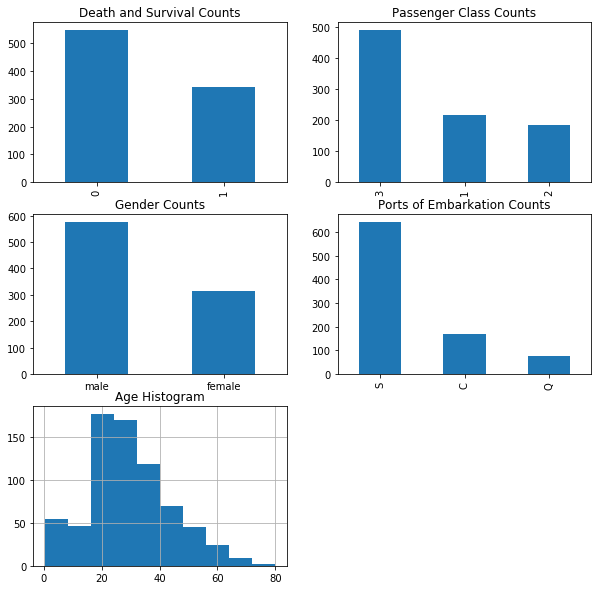

In [6]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
titanic_train['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
titanic_train['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
titanic_train['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
titanic_train['Embarked'].value_counts().plot(kind='bar', 
                                         title='Ports of Embarkation Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
titanic_train['Age'].hist()
plt.title('Age Histogram')

## Exploring Features

### Feature: Passenger Classes

In [7]:
pclass_xt = pd.crosstab(titanic_train['Pclass'], titanic_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


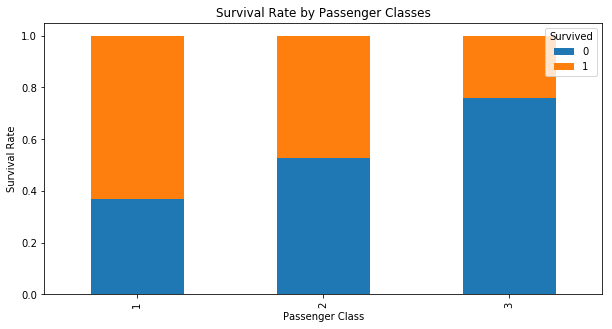

In [8]:
# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

##### passenger class seems to have a significant impact on whether a passenger survived. Those in First Class the highest chance for survival.

### Feature: Sex

#### Converting The Sex Column To Numeric

In [9]:
# Replace all the occurences of male with 0 , female with 1
titanic_train.loc[titanic_train["Sex"] == "male", "Sex"] = 0
titanic_train.loc[titanic_train["Sex"] == "female", "Sex"] = 1

In [10]:
# Transform Sex from a string to a number representation:
titanic_train['Sex'] = titanic_train['Sex'].astype(int)

In [11]:
sex_val_xt = pd.crosstab(titanic_train['Sex'], titanic_train['Survived'])
sex_val_xt

Survived,0,1
Sex,,
0,468,109
1,81,233


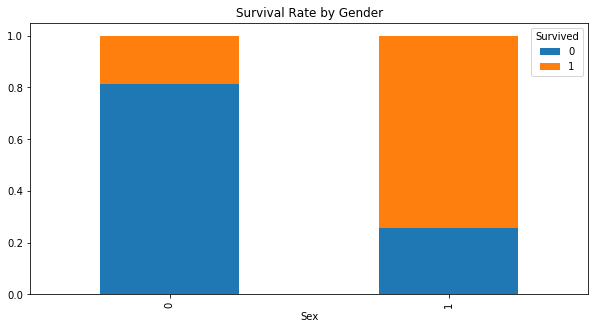

In [12]:
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender')

##### The majority of females survived, whereas the majority of males did not.

#### Survival rate by looking at both Sex and Pclass.

In [13]:
# Count males and females in each Pclass:
passenger_classes = sorted(titanic_train['Pclass'].unique())

for p_class in passenger_classes:
    print('M: ', p_class, len(titanic_train[(titanic_train['Sex'] == 0) & 
                             (titanic_train['Pclass'] == p_class)]))
    print('F: ', p_class, len(titanic_train[(titanic_train['Sex'] == 1) & 
                             (titanic_train['Pclass'] == p_class)]))

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


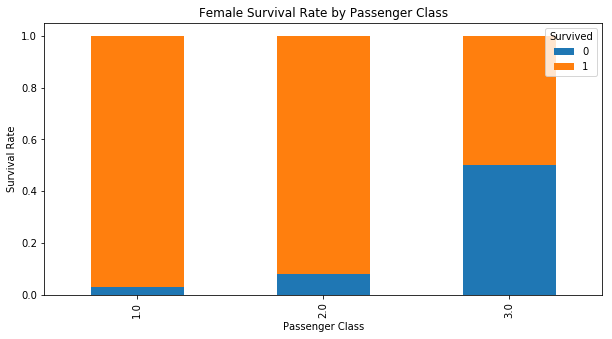

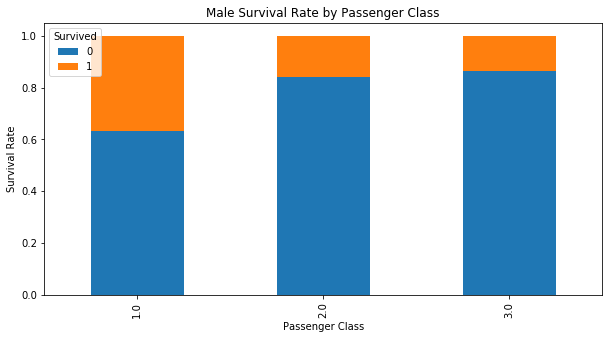

In [14]:
# Plot Female Survival Rate by Passenger Class
females_df = titanic_train[titanic_train['Sex'] == 1]
females_xt = pd.crosstab(females_df['Pclass'], titanic_train['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot Male Survival Rate by Passenger Class
males_df = titanic_train[titanic_train['Sex'] == 0]
males_xt = pd.crosstab(males_df['Pclass'], titanic_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

##### The vast majority of females in First and Second class survived. Males in First class had the highest chance for survival.

### Feature: Embarked

In [15]:
titanic_train["Embarked"].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

#### Replace the missing values with most common embarkation port (S)

In [16]:
titanic_train["Embarked"] = titanic_train["Embarked"].fillna("S")

#### Converting The Embarked Column to Numerical

In [17]:
# Assign the code 0 to S, 1 to C, and 2 to Q.
titanic_train.loc[titanic_train["Embarked"] == "S", "Embarked"] = 0
titanic_train.loc[titanic_train["Embarked"] == "C", "Embarked"] = 1
titanic_train.loc[titanic_train["Embarked"] == "Q", "Embarked"] = 2

In [18]:
# Transform Embarked from a string to a number representation
titanic_train['Embarked'] = titanic_train['Embarked'].astype(int)

In [19]:
embarked_val_xt = pd.crosstab(titanic_train['Embarked'], titanic_train['Survived'])
embarked_val_xt

Survived,0,1
Embarked,,
0,427,219
1,75,93
2,47,30


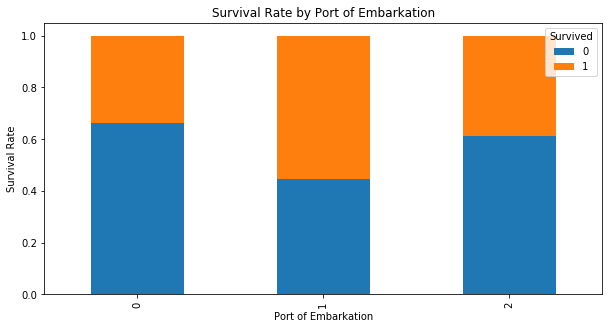

In [20]:
embarked_val_xt_pct = embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

##### It appears those that embarked in location 'C': 1 had the highest rate of survival.

### Feature: Age

In [21]:
titanic_train["Age"].value_counts(dropna=False)

NaN       177
 24.00     30
 22.00     27
 18.00     26
 28.00     25
 19.00     25
 30.00     25
 21.00     24
 25.00     23
 36.00     22
 29.00     20
 32.00     18
 26.00     18
 35.00     18
 27.00     18
 16.00     17
 31.00     17
 34.00     15
 23.00     15
 33.00     15
 20.00     15
 39.00     14
 17.00     13
 42.00     13
 40.00     13
 45.00     12
 38.00     11
 50.00     10
 2.00      10
 4.00      10
         ... 
 28.50      2
 63.00      2
 0.83       2
 30.50      2
 70.00      2
 57.00      2
 0.75       2
 13.00      2
 59.00      2
 10.00      2
 64.00      2
 40.50      2
 45.50      2
 32.50      2
 20.50      1
 24.50      1
 0.67       1
 70.50      1
 0.92       1
 74.00      1
 34.50      1
 14.50      1
 80.00      1
 12.00      1
 53.00      1
 36.50      1
 55.50      1
 66.00      1
 23.50      1
 0.42       1
Name: Age, dtype: int64

##### Replace mssing values with the median of the column

In [22]:
titanic_train["Age"] = titanic_train["Age"].fillna(titanic_train["Age"].median())

In [23]:
# Ensure Age does not contain any missing values
len(titanic_train[titanic_train['Age'].isnull()])

0

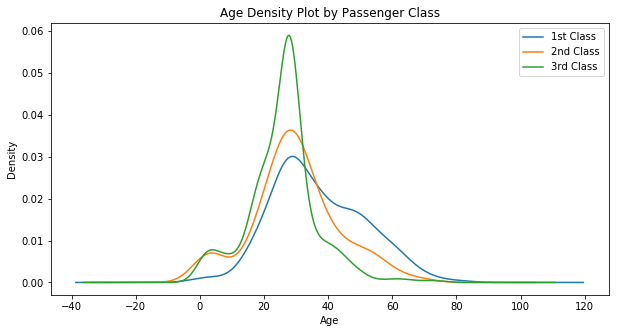

In [24]:
# Plot Age density by Pclass
for pclass in passenger_classes:
    titanic_train.Age[titanic_train.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

##### the first class passengers were generally older then second class passengers, which in turn were older than third class passengers. We've determined that first class passengers had a higher survival rate than second class passengers, which in turn had a higher survival rate than third class passengers.

F:\ANACONDA\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
F:\ANACONDA\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


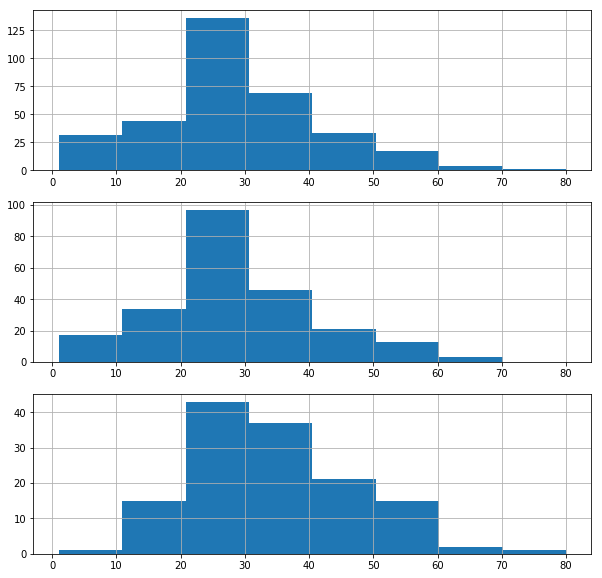

In [25]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 1)
max_age = max(titanic_train['Age'])

# Plot the Age histogram for Survivors
plt.subplot2grid(fig_dims, (0, 0))
survived_df = titanic_train[titanic_train['Survived'] == 1]
survived_df['Age'].hist(bins=max_age / bin_size, range=(1, max_age))

# Plot the Age histogram for Females
plt.subplot2grid(fig_dims, (1, 0))
females_df = titanic_train[(titanic_train['Sex'] == 1) & (titanic_train['Survived'] == 1)]
females_df['Age'].hist(bins=max_age / bin_size, range=(1, max_age))

# Plot the AgeFill histogram for first class passengers
plt.subplot2grid(fig_dims, (2, 0))
class1_df = titanic_train[(titanic_train['Pclass'] == 1) & (titanic_train['Survived'] == 1)]
class1_df['Age'].hist(bins=max_age / bin_size, range=(1, max_age))

##### In the first graph, see that most survivors come from the 20's to 30's age ranges and might be explained by the following two graphs. The second graph shows most females are within their 20's. The third graph shows most first class passengers are within their 30's.

### Feature: Family Size

Define a new feature FamilySize that is the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses):

In [26]:
titanic_train['FamilySize'] = titanic_train['SibSp'] + titanic_train['Parch']
titanic_train['FamilySize'].head()

0    1
1    1
2    0
3    1
4    0
Name: FamilySize, dtype: int64

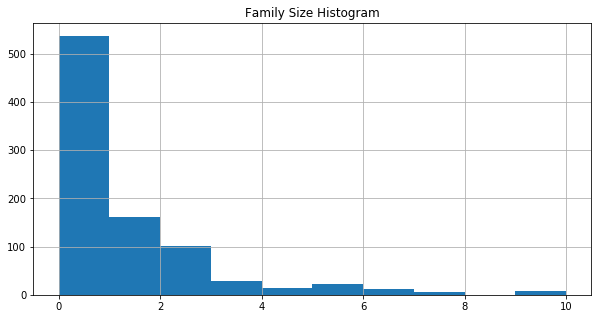

In [27]:
titanic_train['FamilySize'].hist()
plt.title('Family Size Histogram')

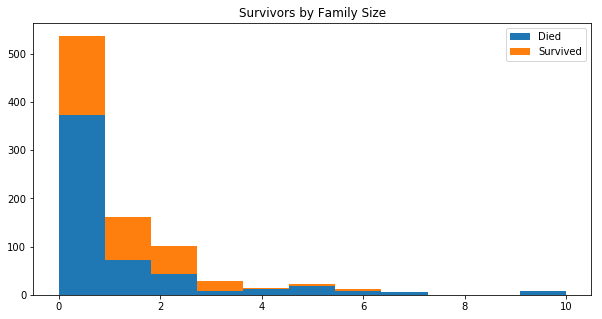

In [28]:
family_sizes = sorted(titanic_train['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = titanic_train[titanic_train['Survived'] == 0]['FamilySize']
df2 = titanic_train[titanic_train['Survived'] == 1]['FamilySize']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

### Feature: Title

The length of the name in the name column could pertain to how rich the person was, and therefore their position on the Titanic.

In [29]:
import re

# A function to get the title from a name
def get_title(name):
    # Use a regular expression to search for a title  
    # Titles always consist of capital and lowercase letters, and end with a period
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it
    if title_search:
        return title_search.group(1)
    return ""

# Get all of the titles, and print how often each one occurs
titles = titanic_train["Name"].apply(get_title)
print(pd.value_counts(titles))

# Map each title to an integer  
# Some titles are very rare, so they're compressed into the same codes as other titles
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything
print(pd.value_counts(titles))

# Add in the title column
titanic_train["Title"] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Sir           1
Ms            1
Don           1
Lady          1
Countess      1
Capt          1
Mme           1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


In [30]:
titanic_train["Title"].head(10)

0    1
1    3
2    2
3    3
4    1
5    1
6    1
7    4
8    3
9    3
Name: Title, dtype: object

In [31]:
titanic_train['Title'] = titanic_train['Title'].astype(int)

### Feature: Family ID

Generate a feature that indicates which family passengers belong to. Because survival was probably very dependent on your family and the people around you, this has a good chance of being a helpful feature.

In [32]:
import operator

# A dictionary mapping family name to ID
family_id_mapping = {}

# A function to get the ID for a particular row
def get_family_id(row):
    # Find the last name by splitting on a comma
    last_name = row["Name"].split(",")[0]
    # Create the family ID
    family_id = "{0}{1}".format(last_name, row["FamilySize"])
    # Look up the ID in the mapping
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            # Get the maximum ID from the mapping, and add 1 to it if we don't have an ID
            current_id = (max(family_id_mapping.items(), key=operator.itemgetter(1))[1] + 1)
        family_id_mapping[family_id] = current_id
    return family_id_mapping[family_id]

# Get the family IDs with the apply method
family_ids = titanic_train.apply(get_family_id, axis=1)

# There are a lot of family IDs, so we'll compress all of the families with less than three members into one code
family_ids[titanic_train["FamilySize"] < 3] = -1

# Print the count of each unique ID
print(pd.value_counts(family_ids))

titanic_train["FamilyId"] = family_ids

-1      800
 14       8
 149      7
 63       6
 50       6
 59       6
 17       5
 384      4
 27       4
 25       4
 162      4
 8        4
 84       4
 340      4
 43       3
 269      3
 58       3
 633      2
 167      2
 280      2
 510      2
 90       2
 83       1
 625      1
 376      1
 449      1
 498      1
 588      1
dtype: int64


### Final Data Preparation for Machine Learning

In [33]:
# Show only the columns of type 'object' (strings)
titanic_train.dtypes[titanic_train.dtypes.map(lambda x: x == 'object')]

Name      object
Ticket    object
Cabin     object
dtype: object

In [34]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Title',
       'FamilyId'],
      dtype='object')

In [35]:
# Drop the columns that won't use
titanic_train = titanic_train.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1)

In [36]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'FamilySize', 'Title', 'FamilyId'],
      dtype='object')

## Making Predictions With Machine Learning

In [37]:
# Read the test data
titanic_test = pd.read_csv('C:/Users/i7/csv/kaggle/titanic/test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##### The test data does not contain the column 'Survived', use the trained model to predict these values.

### Cleaning Test Data

Do the same cleaning operations to the test set

In [39]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [40]:
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
titanic_test['Sex'] = titanic_test['Sex'].astype(int)

In [41]:
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")
# Assign the code 0 to S, 1 to C, and 2 to Q.
titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

In [42]:
# Assign the code 0 to S, 1 to C, and 2 to Q.
titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2
titanic_test['Embarked'] = titanic_test['Embarked'].astype(int)

In [43]:
titanic_test["Age"] = titanic_test["Age"].fillna(titanic_test["Age"].median())

In [44]:
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].mean())

In [45]:
titanic_test['FamilySize'] = titanic_test['SibSp'] + titanic_test['Parch']

In [46]:
titles_2 = titanic_test["Name"].apply(get_title)
title_mapping_2 = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Dona":9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping_2.items():
    titles_2[titles_2 == k] = v
print(pd.value_counts(titles_2))
titanic_test["Title"] = titles_2

1    240
2     79
3     72
4     21
7      2
6      2
9      1
5      1
Name: Name, dtype: int64


In [47]:
titanic_test['Title'] = titanic_test['Title'].astype(int)

In [48]:
family_ids_2 = titanic_test.apply(get_family_id, axis=1)
family_ids_2[titanic_test["FamilySize"] < 3] = -1
print(pd.value_counts(family_ids))
titanic_test["FamilyId"] = family_ids

-1      800
 14       8
 149      7
 63       6
 50       6
 59       6
 17       5
 384      4
 27       4
 25       4
 162      4
 8        4
 84       4
 340      4
 43       3
 269      3
 58       3
 633      2
 167      2
 280      2
 510      2
 90       2
 83       1
 625      1
 376      1
 449      1
 498      1
 588      1
dtype: int64


In [49]:
titanic_test = titanic_test.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1)

In [50]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize',
       'Title', 'FamilyId'],
      dtype='object')

In [51]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
Fare           418 non-null float64
Embarked       418 non-null int32
FamilySize     418 non-null int64
Title          418 non-null int32
FamilyId       418 non-null int64
dtypes: float64(2), int32(3), int64(4)
memory usage: 24.6 KB


### Identifying The Best Features To Use

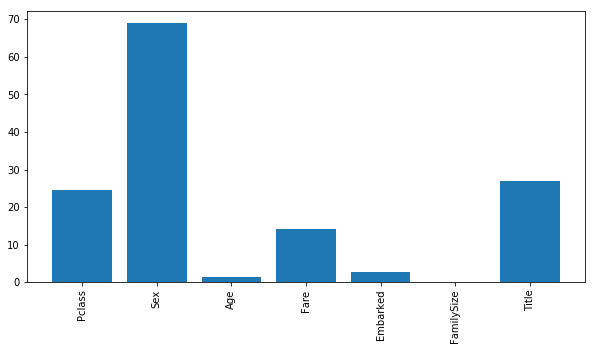

In [52]:
from sklearn.feature_selection import SelectKBest, f_classif

predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic_train[predictors], titanic_train["Survived"])

# Get the raw p-values for each feature, and transform them from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores  
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

##### "Pclass", "Sex", "Title", and "Fare" are the best features

## Gradient Boosting Implementation

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]

# The algorithms we want to ensemble
# Using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), predictors],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]

full_predictions = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    alg.fit(titanic_train[predictors], titanic_train["Survived"])
    # Predict using the test dataset. Convert all the columns to floats to avoid an error
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)

# The gradient boosting classifier generates better predictions, so we weight it higher
# Convert the predictions to either 0 or 1. Convert the predictions less than or equal to .5 to 0, and those greater than .5 to 1.
predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions[predictions <= .5] = 0
predictions[predictions > .5] = 1
predictions = predictions.astype(int)
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })
